In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
data = sio.loadmat('mnist.mat?raw=true')


--2022-11-07 17:54:42--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2022-11-07 17:54:42--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2022-11-07 17:54:42--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

In [2]:
np.shape(data['trainX']) #images 

(60000, 784)

In [3]:
np.shape(data['trainY']) #lables

(1, 60000)

In [4]:
# using train data

X = data['trainX'][0:1000]
Y = data['trainY'][:,:1000]

#X = data['trainX']
#Y = data['trainY']

print(np.shape(X))
print(np.shape(Y))

(1000, 784)
(1, 1000)


In [5]:
def euclidean (row1, row2):
  distance = 0
  for i in range(len(row1)-1):
    distance += (int(row1[i]) - int(row2[i]))**2
  return np.sqrt(distance)

def find_neighbors(dataX, digit):
  distance = []
  index = []
  np.array(distance)
  np.array(index)

  for x in dataX:
    distance.append(euclidean(digit,x))
    
  index = np.argsort(distance)

  return index


In [6]:
def get_label(index,K,x,y):
  sorted = []
  sl = []
  np.array(sorted)
  np.array(sl)
  
  for i in index:
    sorted.append(x[i])
    sl.append(y[0][i])

  dataN = x[:K]
  labelN = sl[:K]

  return labelN

In [7]:
def prediction(l):
  classes = [] 
  for i in l:
    classes.append(i)
    pred = max(classes, key = classes.count)
  return pred

In [8]:
K = 30
P = []
np.array(P)


for i in X:
  index = find_neighbors(X, i)
  labelN = get_label(index,K,X,Y)
  L = prediction(labelN)
  P.append(L)

print(P)

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 7, 8, 6, 9, 4, 0, 9, 1, 1, 2, 9, 3, 7, 1, 1, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 8, 3, 3, 0, 7, 1, 9, 8, 0, 9, 4, 1, 4, 1, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 1, 1, 1, 7, 0, 0, 2, 6, 7, 8, 1, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 9, 7, 1, 7, 1, 1, 6, 3, 0, 1, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 7, 0, 1, 7, 1, 8, 6, 4, 1, 6, 3, 4, 1, 9, 1, 3, 3, 1, 5, 4, 7, 1, 4, 2, 1, 5, 8, 6, 9, 3, 1, 6, 1, 9, 7, 6, 0, 3, 4, 2, 9, 3, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 7, 5, 1, 5, 9, 1, 0, 3, 1, 7, 5, 9, 1, 7, 6, 2, 8, 2, 1, 5, 0, 7, 4, 9, 7, 8, 3, 7, 1, 1, 8, 3, 6, 1, 0, 7, 1, 0, 0, 1, 1, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 7, 8, 9, 9, 1, 0, 7, 1, 6, 2, 0, 3, 8, 4, 6, 5, 1, 6, 3, 7, 5, 8, 0, 9, 1, 0, 7, 1, 2, 2, 3, 3, 1, 4, 7, 5, 5, 6, 5, 7, 4, 8, 5, 9, 7, 1, 1, 4, 4, 5, 6, 4, 1, 2, 6, 3, 9, 3, 7, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 1, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 1, 9, 0, 3, 9, 6, 7, 2, 0, 3, 5, 4, 3, 6, 5, 

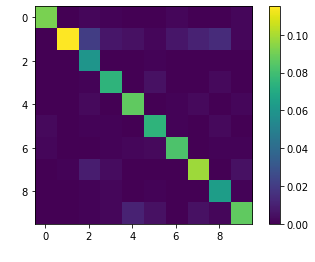


Accuracy for train data: 0.836


In [9]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(P,Y[0], normalize='all')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[0,2,4,6,8])

cm_display.plot(include_values=None)
plt.xticks([0,2,4,6,8])
plt.xlabel(' ')
plt.yticks([0,2,4,6,8])
plt.ylabel(' ')

plt.savefig('confusion_matrix.png')
plt.show()

accuracy = metrics.accuracy_score(Y[0], P)
print('\nAccuracy for train data:', accuracy)

In [10]:
# using Test data !

X2 = data['testX'][0:300]
Y2 = data['testY'][:,:300]

#X2 = data['testX']
#Y2 = data['testY']

K2 = 30
P2 = []
np.array(P2)


for i in X2:
  index = find_neighbors(X2, i)
  labelN = get_label(index,K2,X2,Y2)
  L = prediction(labelN)
  P2.append(L)

#print(P2)

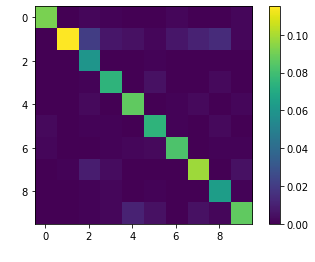


Accuracy for test data: 0.7466666666666667


In [11]:
confusion_matrix2 = metrics.confusion_matrix(P2,Y2[0], normalize='all')
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[0,2,4,6,8])

cm_display2.plot(include_values=None)
plt.xticks([0,2,4,6,8])
plt.xlabel(' ')
plt.yticks([0,2,4,6,8])
plt.ylabel(' ')

plt.savefig('confusion_matrix2.png')
plt.show()

accuracy2 = metrics.accuracy_score(Y2[0], P2)
print('\nAccuracy for test data:', accuracy2)